# Exercises 10

## Q1

a) A and B are fixed. The order that the replicates are selected is random, but the factors are fixed: three fixed machines, two fixed outlets per machine.

The parent factor, Factor A, is the machine factor.

The child factor, Factor B, is the outlet factor.

In [17]:
library(MASS)

In [1]:
resistance <- c(4.0,5.5,5.5,9.0,
                4.5,6.0,5.0,6.5,
                3.0,4.0,6.0,7.0,
                5.0,4.0,7.5,7.5,
                3.5,5.0,6.0,7.5,
                3.5,4.5,5.0,7.5)

In [4]:
machine <- factor(c(rep(1:3, rep(8,3))))

In [10]:
outlet <- factor(rep(rep(c('L','R'), rep(4,2)), 3))

In [12]:
component <- data.frame(resistance, machine, outlet)

In [13]:
rm(resistance, machine, outlet)
attach(component)

## ANOVA

In [14]:
component.aov <- aov(resistance ~ machine/outlet)

summary(component.aov)

               Df Sum Sq Mean Sq F value Pr(>F)
machine         2   0.77  0.3854   0.132  0.877
machine:outlet  3   2.78  0.9271   0.317  0.813
Residuals      18  52.69  2.9271               

## Neither tests have sufficient  evidence to reject the null hypothesis.

In [16]:
model.tables(component.aov)

Tables of effects

 machine 
machine
       1        2        3 
 0.22917 -0.02083 -0.20833 

 machine:outlet 
       outlet
machine L       R      
      1  0.2500 -0.2500
      2 -0.5000  0.5000
      3  0.1875 -0.1875

## **THEY STILL PLOTTED THE FITTED VALUES AGAINST THE RESIDUALS DESPITE NOT REJECTING THE HYPOTHESIS TESTS**

In [18]:
component.stdres <- stdres(component.aov)

component.fitted <- fitted(component.aov)

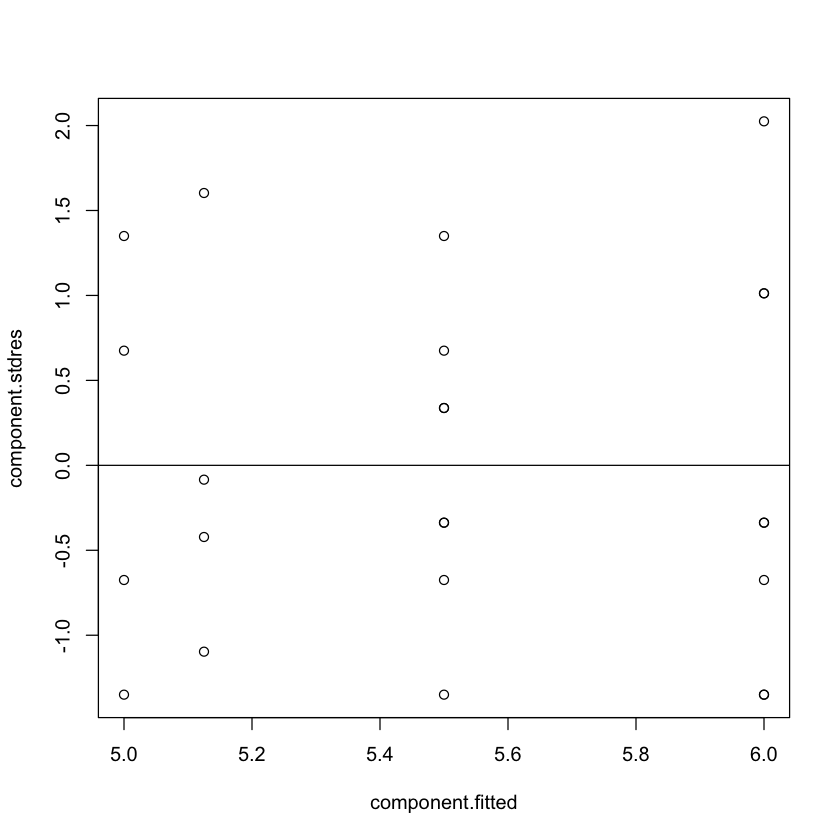

In [19]:
plot(component.fitted, component.stdres)
abline(h=0)

## ALSO PLOT FACTORS VS RESIDUALS

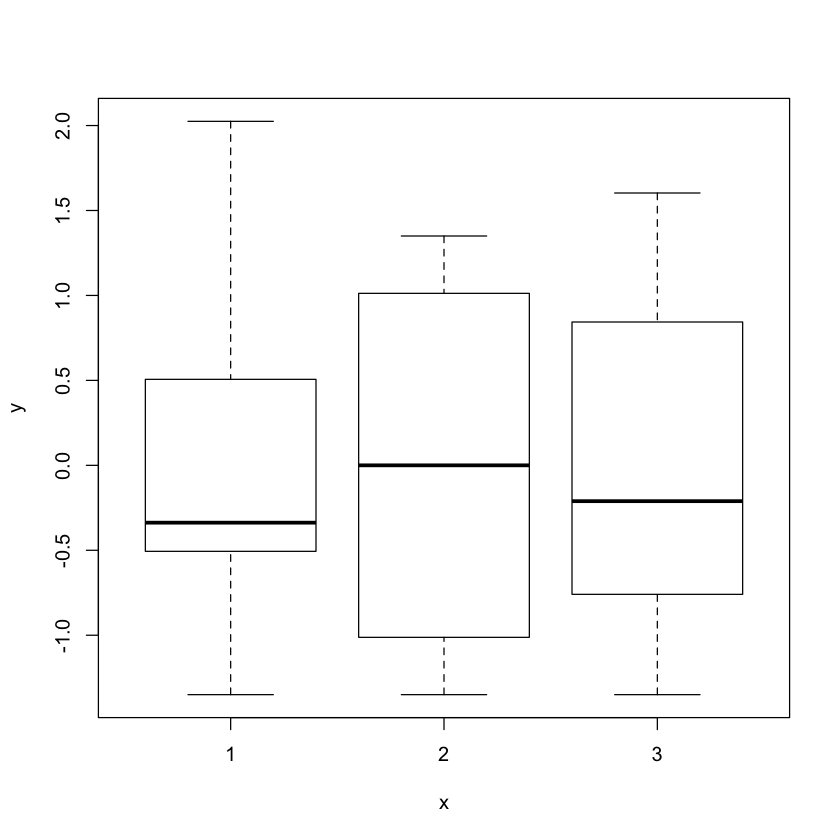

In [20]:
plot(machine, component.stdres)

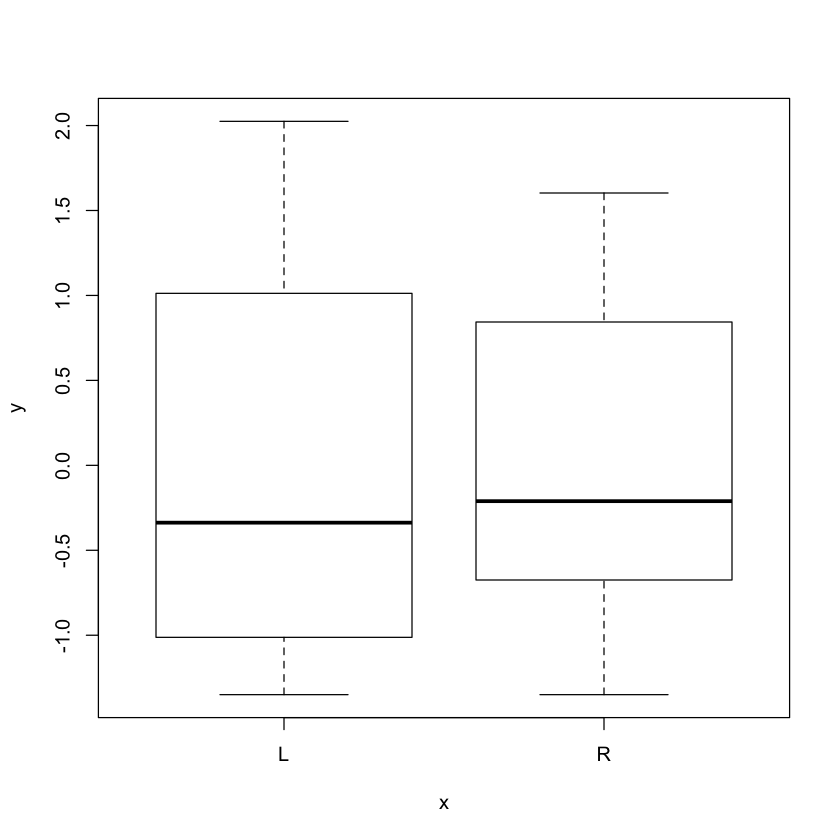

In [21]:
plot(outlet, component.stdres)

##